In [1]:
import gzip
import pickle 
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/mlpf/")
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


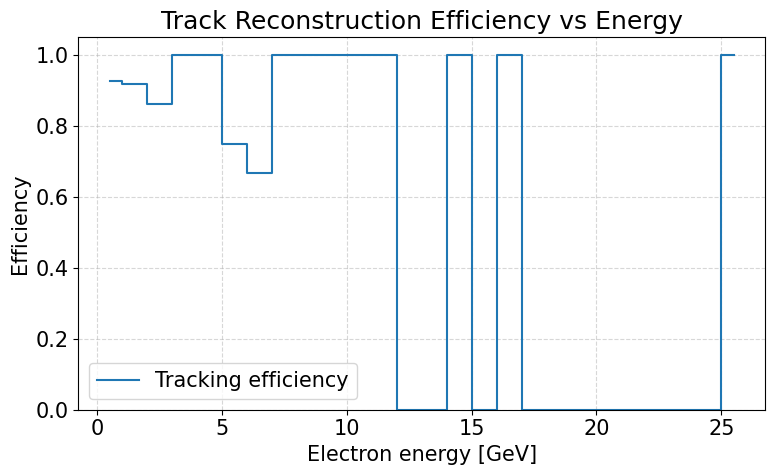

In [3]:
# print(data)
import numpy as np
data = np.load("/afs/cern.ch/work/m/mgarciam/private/mlpf/notebooks/data_numhits_gen1.npy", allow_pickle=True).item()
energy_track = np.concatenate(data['electrons_with_tracks_E'])
energy_no_track = np.concatenate(data["electrons_with_no_tracks_E"])

bins = np.arange(0, max(energy_track.max(), energy_no_track.max()) + 1, 1)

# Histogram counts
hist_track, _ = np.histogram(energy_track, bins=bins)
hist_no_track, _ = np.histogram(energy_no_track, bins=bins)

# Compute efficiency
total = hist_track + hist_no_track
efficiency = np.divide(hist_track, total, out=np.zeros_like(hist_track, dtype=float), where=total > 0)

# Bin centers for plotting
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot
plt.figure(figsize=(8,5))
plt.step(bin_centers, efficiency, where='mid', label='Tracking efficiency')
plt.xlabel('Electron energy [GeV]')
plt.ylabel('Efficiency')
plt.title('Track Reconstruction Efficiency vs Energy')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
np.arange(0, max(energy_track.max(), energy_no_track.max()) + 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

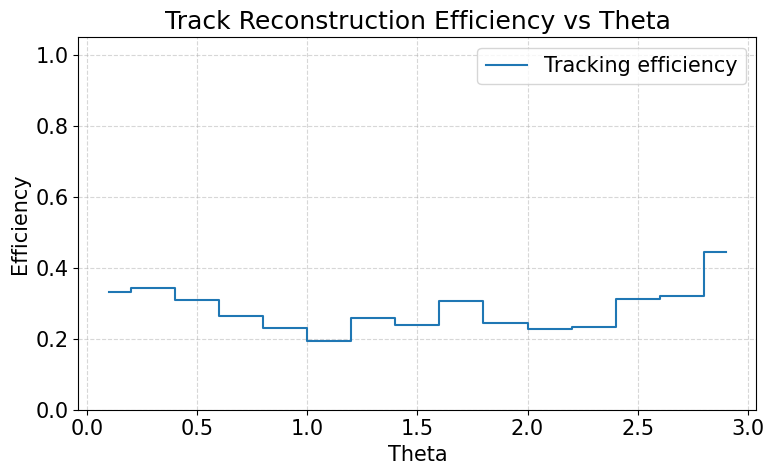

In [13]:
energy_track = np.concatenate(data['electrons_with_tracks_phi'])
energy_no_track = np.concatenate(data["electrons_with_no_tracks_phi"])

bins = np.arange(0, max(energy_track.max(), energy_no_track.max()) , 0.2)

# Histogram counts
hist_track, _ = np.histogram(energy_track, bins=bins)
hist_no_track, _ = np.histogram(energy_no_track, bins=bins)

# Compute efficiency
total = hist_track + hist_no_track
efficiency = np.divide(hist_track, total, out=np.zeros_like(hist_track, dtype=float), where=total > 0)

# Bin centers for plotting
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot
plt.figure(figsize=(8,5))
plt.step(bin_centers, efficiency, where='mid', label='Tracking efficiency')
plt.xlabel('Theta')
plt.ylabel('Efficiency')
plt.title('Track Reconstruction Efficiency vs Theta')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

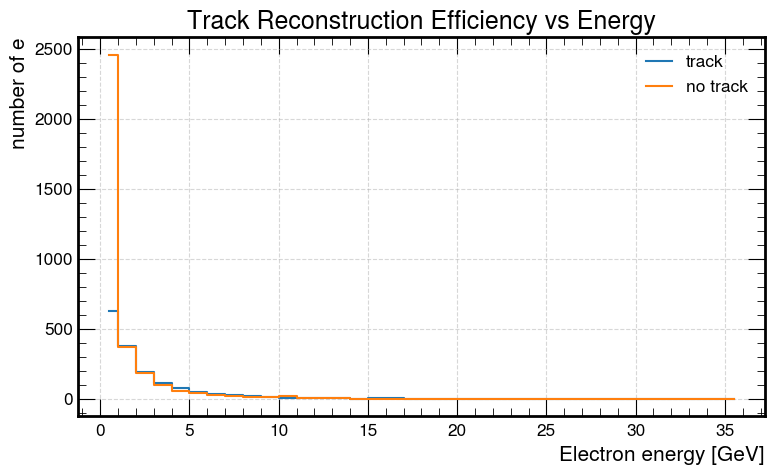

In [5]:
plt.figure(figsize=(8,5))
plt.step(bin_centers, hist_track, where='mid', label='track')
plt.step(bin_centers, hist_no_track, where='mid', label='no track')
plt.xlabel('Electron energy [GeV]')
plt.ylabel('number of e')
plt.title('Track Reconstruction Efficiency vs Energy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import awkward as ak
outputs = ak.from_parquet("/eos/experiment/fcc/users/m/mgarciam/mlpf/CLD/train/Zuds_2025_09_29_key4hep_20250529_CLD_r20250526/pf_tree_2.parquet")
outputs[]

<Record {X_track: [[...], ...], X_hit: ..., ...} type='{X_track: 100 * var ...'>

In [5]:
masses= []
for i in range(0,100):
    momentum_i = outputs["X_gen"][i][:,12:15]
    energy = outputs["X_gen"][i][:,8]
    mass = outputs["X_gen"][i][:,10]
    momentum_i= np.array(momentum_i)
    x =momentum_i[:,0]
    y =momentum_i[:,1]
    z =momentum_i[:,2]
    m=np.sqrt(np.sum(energy)**2-np.sum(momentum_i)**2)
    masses.append(m)

In [6]:
masses

[90.63034864186447,
 87.41716489544713,
 88.85205032235923,
 89.61716402457078,
 87.6712120435842,
 91.09350222012499,
 90.17135453953566,
 88.11046134917285,
 91.70240136739775,
 89.89527078913315,
 91.10193313104612,
 90.48653316220435,
 92.63611803835737,
 90.14398909463046,
 91.8823808870908,
 91.0373794873405,
 90.75383667928598,
 92.50737048123611,
 92.60250278916762,
 88.56509308923354,
 91.45193154365587,
 90.41817064376804,
 88.98670121044576,
 90.90708210106128,
 90.09484027277996,
 90.38230459780827,
 91.54631612536296,
 90.39234604933104,
 91.05458485563786,
 90.54536611678897,
 90.16130759546522,
 85.75985775117505,
 91.08480739959667,
 92.17041246321156,
 92.54783708088142,
 90.00449163699028,
 87.7075093685065,
 94.81927897225972,
 88.31573141877108,
 86.07571189669477,
 91.84319590727003,
 89.67354191273377,
 91.42907420234073,
 89.40465149360794,
 93.84473443139969,
 89.97416445856086,
 89.5015098073902,
 88.45102501076093,
 92.97700017091246,
 89.06518643804435,
 90.4

In [60]:
np.where(np.abs(outputs["X_gen"][id][:,0])==11)

(<Array [29, 30] type='2 * int64'>,)

In [61]:

outputs["ygen_track"][id]

<Array [-1, 4, 0, 5, -1, 8, -1, -1] type='8 * int64'>

In [8]:
outputs1["X_gen"][0][:,8]

<Array [1.34, 3.53, 27.3, 4.14, ..., 0.99, 1.6, 0.349] type='33 * float64'>

In [22]:
outputs["ygen_track"][1]


<Array [21, 2, 6, 1, 18, 7, -1, ..., 8, -1, 2, 30, 1, -1, 22] type='15 * int64'>

In [13]:
import numpy as np
np.array(outputs["ygen_track"][1])

array([-2112.,  -211.,  -321.,    22.,    22.,    22.,  -211.,   211.,
        -211.,    22.,    22.,   130.,    22.,    22.,    22.,    22.,
          22.,    22.,  -211.,  2112.,   211.,  -211.,   211.,    22.,
          22.,    22.,    11.,    22.,    22.,    22.,  -211.,   211.,
         -11.])

In [101]:
outputs["pfo_calohit"][0]

<Array [3, 3, 0, 3, 3, 0, 3, 3, ..., 3, 3, 11, 3, 3, 3, 3] type='2781 * int64'>

In [37]:
#"/eos/experiment/fcc/ee/datasets/DC_tracking/Pythia_evaluation/Zcard/reco_Zcard_1.root"
datasets = {
    "test": "/eos/experiment/fcc/users/m/mgarciam/mlpf/CLD/eval/Zuds_2025_09_29_key4hep_20250529_CLD_r20250526/pf_tree_50002.parquet",
    "train": "/eos/experiment/fcc/users/m/mgarciam/mlpf/CLD/eval/Zuds_2025_09_29_key4hep_20250529_CLD_r20250526/pf_tree_50002.parquet"
}
from src.utils.utils import to_filelist
from src.dataset.dataset import SimpleIterDataset
class Args:
    def __init__(self, datasets):
        self.data_train = [datasets]
        self.data_val = [datasets]
        #self.data_train = files_train
        self.data_config = '/afs/cern.ch/work/m/mgarciam/private/mlpf/config_files/config_hits_track_v4.yaml'
        self.extra_selection = None
        self.train_val_split = 1
        self.data_fraction = 1
        self.file_fraction = 1
        self.fetch_by_files = False
        self.fetch_step = 1
        self.steps_per_epoch = None
        self.in_memory = False
        self.local_rank = None
        self.copy_inputs = False
        self.no_remake_weights = False
        self.batch_size = 1
        self.num_workers = 0
        self.demo = False
        self.laplace = False
        self.diffs = False
        self.class_edges = False


args = {key: Args(value) for key, value in datasets.items()}

datas = {}
files_dict = {}
for key in datasets:
    train_range = (0, args[key].train_val_split)
    train_file_dict, train_files = to_filelist(args[key], 'val')
    train_data = SimpleIterDataset(train_file_dict, args[key].data_config, for_training=False,
                                   extra_selection=args[key].extra_selection,
                                   remake_weights=True,
                                   load_range_and_fraction=(train_range, args[key].data_fraction),
                                   file_fraction=args[key].file_fraction,
                                   fetch_by_files=args[key].fetch_by_files,
                                   fetch_step=args[key].fetch_step,
                                   infinity_mode=False,
                                   in_memory=args[key].in_memory,
                                   async_load=False,
                                   name='train')
    datas[key] = train_data
    files_dict[key] = train_files

['/eos/experiment/fcc/users/m/mgarciam/mlpf/CLD/eval/Zuds_2025_09_29_key4hep_20250529_CLD_r20250526/pf_tree_50002.parquet']


['/eos/experiment/fcc/users/m/mgarciam/mlpf/CLD/eval/Zuds_2025_09_29_key4hep_20250529_CLD_r20250526/pf_tree_50002.parquet']


In [60]:
itera = iter(train_data)

=== Restarting DataIter train, seed=None ===
Start fetching next batch, len(filelist)=1, load_range=(0, 1)


In [61]:
g,y = next(itera)

In [62]:
g.ndata['pandora_pfo'].shape, torch.sum(g.ndata['pandora_pfo']==-1)

(torch.Size([2793]), tensor(5))

In [96]:
torch.sum(g.ndata['pandora_pfo']==0)

tensor(517)

In [97]:
outputs["X_pandora"][0]

<Array [[-211, -0.853, 0.417, ..., 1.15, 1.36], ...] type='17 * var * float64'>

In [100]:

import pandas as pd
import plotly.express as px

mask = (g.ndata['pandora_pfo']==0)
tidx =  1*(g.ndata['particle_number'][mask].view(-1,1))
#tidx =    1*(g.ndata['hit_link_modified'][mask].view(-1,1))+1
features =  20*(g.ndata['e_hits'][mask].view(-1,1)) + 1*g.ndata["h"][mask][:,-1].view(-1,1)
X = g.ndata["pos_hits_xyz"][mask] #[mask]
data = {
            "X":X[:, 0].view(-1, 1).detach().cpu().numpy(),
            "Y": X[:, 1].view(-1, 1).detach().cpu().numpy(),
            "Z": X[:, 2].view(-1, 1).detach().cpu().numpy(),
            "tIdx": tidx.view(-1, 1).detach().cpu().numpy(),
            "features": features.view(-1, 1).detach().cpu().numpy(),
        }
hoverdict = {}
# if hoverfeat is not None:
#     for j in range(hoverfeat.shape[1]):
#         hoverdict["f_" + str(j)] = hoverfeat[:, j : j + 1]
#     data.update(hoverdict)

# if nidx is not None:
#     data.update({"av_same": av_same})

df = pd.DataFrame(
np.concatenate([data[k] for k in data], axis=1),
columns=[k for k in data],
)
rdst = np.random.RandomState(1234567890)  # all the same
# shuffle_truth_colors(df, "tIdx", rdst)

hover_data = ["tIdx"] #+ [k for k in hoverdict.keys()]
# if nidx is not None:
#     hover_data.append("av_same")
fig = px.scatter_3d(
df,
x="X",
y="Y",
z="Z",
color="tIdx",
size="features",
hover_data=hover_data,
template="simple_white",
)
fig.update_traces(marker=dict(line=dict(width=0)))